In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Parcial

## a)

In [42]:
# Definir las condiciones iniciales y parámetros
x0_1 = 0
y0_1 = 0.7
x0_2 = 0
y0_2 = -0.7

v0x_1 = 0.1
v0y_1 = 0
v0x_2 = -0.1
v0y_2 = 0

w = 1
l0 = 1

r_inicial = np.sqrt((x0_2 - x0_1)**2 + (y0_2 - y0_1)**2)

In [43]:
def momento_angular(u, r):
    V = np.array([u[:,1] - u[:,5], u[:,3] - u[:,7]])   
    momento_angular = np.cross(r, V, axis=0)
    return momento_angular

In [44]:
def potEf(momento_angular, r):
    U = 0.5 * w * (r - l0)**2
    V = (momento_angular**2) / (2 * r**2)
    return U + V

In [45]:
def energia_mecanica_inicial(x0_1, y0_1, x0_2, y0_2, v0x_1, v0y_1, v0x_2, v0y_2, w, l0, r_inicial):
    E_mec_inicial = 0.5 * (v0x_1**2 + v0y_1**2 + v0x_2**2 + v0y_2**2) + 0.5 * w * (r_inicial - l0)**2
    return E_mec_inicial

In [47]:
E_mec_inicial = energia_mecanica_inicial(x0_1, y0_1, x0_2, y0_2, v0x_1, v0y_1, v0x_2, v0y_2, w, l0, r_inicial)

In [48]:
r_range = np.linspace(0.01, 3.1, 2500)
momento_angular_range = np.zeros_like(r_range)  # Asumir momento angular cero para simplificar
U_ef = potEf(momento_angular_range, r_range)

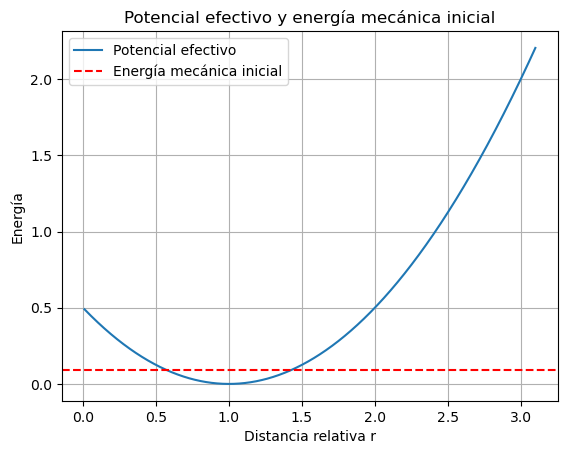

In [49]:
# Graficar el potencial efectivo y la energía mecánica inicial
plt.plot(r_range, U_ef, label='Potencial efectivo')
plt.axhline(y=E_mec_inicial, color='r', linestyle='--', label='Energía mecánica inicial')
plt.xlabel('Distancia relativa r')
plt.ylabel('Energía')
plt.title('Potencial efectivo y energía mecánica inicial')
plt.legend()
plt.grid(True)
plt.show()